<a href="https://colab.research.google.com/github/sarthaknaithani/CS6910_CS22M078/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wandb

In [ ]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

wandb: Currently logged in as: cs22m078. Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 0s 0us/step


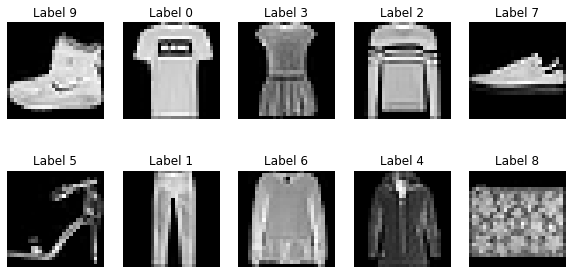

In [ ]:
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="CS6910_Assignment-1",
)

# simulate training
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# x_train is a (60000,28,28) matrix consisting image pixels for training
# y_train is a (60000,1) matrix consisting of labels
# x_test is a (10000,28,28) matrix consisting image pixels for testing
# y_test is a (10000,1) matrix consisting of labels for testing
(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()
labels=set()
i=0
fig,ax=plt.subplots(2,5,figsize=(10,5))
row=0
col=0
for pixels in x_train:
  #The matplotlib function imshow() creates an image from a 2-dimensional numpy array
  #pixels is (28,28) 2-D array
  #l is the current label of image
  l=y_train[i]
  if(not(l in labels)):
    if(col>=5):
      col=0
      row+=1
    ax[row][col].imshow(pixels,cmap="gray")
    ax[row][col].set_title("Label {}".format(l))
    ax[row][col].axis(False)
    labels.add(l)
    col+=1
  #if we get all our 10 labels just break the loop
  if(len(labels)==10):
    break;
  i+=1
wandb.log({"plot":plt})   
# finish the wandb run, necessary in notebooks
wandb.finish()

# INITIALIZING THE PARAMETERS

In [ ]:
#USING XAVIER INITIALIZATION TO INITIALIZE WEIGHTS AND BIAS MATRIX
h=int(input('Enter no. of hidden layers '))
neurons=[]
weights=[]
biases=[]
for i in range(0,h):
  n=int(input('Enter no. of neurons in {} hidden layer '.format(i+1)))
  neurons.append(n)
  # appending the weight and bias matrix for the ith layer
  if(i==0):
    weights.append(np.random.randn(n,784)*np.sqrt(2/(n+784)))
    biases.append(np.random.randn(n,1)*np.sqrt(2/(n+1)))
  else:
    weights.append(np.random.randn(n,neurons[i-1])*np.sqrt(2/(n+neurons[i-1])))
    biases.append(np.random.randn(n,1)*np.sqrt(2/(n+1)))
weights.append(np.random.randn(10,neurons[h-1])*np.sqrt(2/(10+neurons[h-1])))
biases.append(np.random.randn(10,1)*np.sqrt(2/(11)))

Enter no. of hidden layers 3
Enter no. of neurons in 1 hidden layer 2
Enter no. of neurons in 2 hidden layer 2
Enter no. of neurons in 3 hidden layer 2


# IMPLEMENTING FEEDFORWARD NEURAL NETWORK

In [ ]:
def sigmoid(a):
  return 1/1+np.exp(-a)
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def FeedForwardNetwork(weights,biases,data):
  #Returns the array containing the output probablity for each class the data can belong
  l=len(biases)
  a=[]
  h=[]
  h.append(data)
  for i in range(1,l+1):
    #weight and bias matrix for hidden-layer i
    weight=weights[i-1]
    bias=biases[i-1]
    #pre activation
    a.append(bias+np.dot(weight,h[i-1]))
    #If last layer that is the output layer we use softmax function else we use sigmoid function
    if(i==l):
      #output function
      h.append(softmax(a[i-1]))
    else:
      #post activation
      h.append(sigmoid(a[i-1]))
  return a[h],a,z

In [1]:
a = np.random.randint(30, 50, size=10)
print(a)

print(sigmoid(a))

NameError: ignored

# BACKPROPOGATION

In [ ]:
def backprop(y_hat, y,A, Z, params, activation_f, batch_size, loss, lamb):
    '''Function to calculate gradients for a minibatch of data once through the NN through backpropagation

    Parameters
    ----------
    y_hat: numpy array
        output from forward propagation/ class probabilities

    y: numpy array
        actual class labels
     
    A: numpy array
        post-activations

    Z: numpy array
        pre-activations   

    params: dict
        contains W and b on the NN   

    activation_f: string
        activation function to be used except the output layer

    batch_size: int
        mini-batch-size

    loss: string
        loss function (MSE/Categorical crossentropy)

    lamb: float
        L2 regularisation lambda

    Returns
    -------
    gradients: dict
        gradients wrt weights and biases

    '''
    L = len(params)//2
    gradients = {}
    
    if loss == 'categorical_crossentropy':
        gradients["dZ"+str(L)] = A[L]-y
    elif loss == 'mse':
        gradients["dZ"+str(L)] = (A[L]-y) * softmax_derivative(Z[L])
    
    for l in range(L,0,-1):
        gradients["dW" + str(l)] = (np.dot(gradients["dZ" + str(l)], A[l-1].T) + lamb*params["W"+str(l)]) / batch_size
        gradients["db" + str(l)] = np.sum(gradients["dZ" + str(l)], axis=1, keepdims=True) / batch_size
        
        if l>1:
            if activation_f == 'sigmoid':
                gradients["dZ"+str(l-1)] = np.matmul(params["W" + str(l)].T, gradients["dZ" + str(l)]) * sigmoid_derivative(Z[l-1])
            elif activation_f == 'relu':
                gradients["dZ"+str(l-1)] = np.matmul(params["W" + str(l)].T, gradients["dZ" + str(l)]) * Relu_derivative(Z[l-1])
            elif activation_f == 'tanh':
                gradients["dZ"+str(l-1)] = np.matmul(params["W" + str(l)].T, gradients["dZ" + str(l)]) * tanh_derivative(Z[l-1])
        
    return gradients
def BackPropogation(weights,biases,A,H,EY):
  # Input Parameters of function
  # --> Model Parameters: weights and biases
  # --> H: Post-activations, A: Pre-Activations
  # --> Y: Actual Class Labels
  # Returns list of gradients for each layer wrt weights and biases(parameters)
  gradients_H=[]
  gradients_W=[]
  gradients_B=[]
  gradients_A=[]
  L=weights.size()
  #Computing Gradient For The Output Layer(Pre Activation)
  gradients_A[L]=EY-H[L]
  for k in range(L,0,-1):
    #compute gradients of the parameters
    gradients_W[k]=np.dot(np.transpose(H[k-1]),gradients_A[k])
    gradients_B[k]=gradients_A[k]

    #compute gradients of the hidden layers
    gradients_H[k-1]=np.matmul(np.transpose(weights[k]),gradients_A[k])
    gradients_A[k-1]=gradients_H[k-1]*sigmoid_derivative(A[k-1])


In [ ]:
for data in x_train:
  # print(data)
  data=np.reshape(data,(784,1))
  data=data/255.0
  print((FeedForwardNetwork(weights,biases,data)))